# Effective Graph Paper
Code to generate "Figure 6 - Breast Cancer Perturbations"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import cana
from cana.datasets.bio import BREAST_CANCER
import matplotlib.pyplot as plt

In [3]:
BC = BREAST_CANCER()
df = pd.read_csv("BreastCancerPerturbationCorrelation.csv")

In [4]:
nodes = {i: n.name for i, n in enumerate(BC.nodes)}

In [5]:
df['Name'] = df['Node'].map(nodes)

In [9]:
dfe = df.loc[df['Graph'] == 'EG', :]
dfi = df.loc[df['Graph'] == 'IG', :]

In [10]:
# Pivot
dfip = dfi.pivot(index='Step', columns='Name', values='Correlation')
dfep = dfe.pivot(index='Step', columns='Name', values='Correlation')

In [11]:
# Diff, Sort, and Order
diff = (dfep - dfip).sum(axis='index').sort_values(ascending=True)
display(diff)
# List ORder
order = diff.index.tolist()
display(order)
#
dfip = dfip.loc[:, order]
dfep = dfep.loc[:, order]
#
display(dfep)

Name
Fulvestrant   -0.082189
Palbociclib   -0.039134
Trametinib     0.697433
Ipatasertib    1.103300
Alpelisib      1.999543
Everolimus     2.949812
Neratinib      2.953434
dtype: float64

['Fulvestrant',
 'Palbociclib',
 'Trametinib',
 'Ipatasertib',
 'Alpelisib',
 'Everolimus',
 'Neratinib']

Name,Fulvestrant,Palbociclib,Trametinib,Ipatasertib,Alpelisib,Everolimus,Neratinib
Step,,,,,,,
1,0.800604,0.702617,0.800604,0.693554,0.800341,0.848859,0.800341
2,0.876324,0.852808,0.915624,0.915463,0.757177,0.838828,0.837923
3,0.845688,0.908163,0.919459,0.930124,0.927128,0.760218,0.894948
4,0.939114,0.927219,0.899392,0.863165,0.946021,0.727627,0.947214
5,0.912723,0.935951,0.902908,0.827729,0.942699,0.730986,0.949975
6,0.915382,0.932718,0.805926,0.759949,0.895449,0.727521,0.941626
7,0.890327,0.933063,0.667760,0.724359,0.863303,0.729571,0.919752
8,0.861805,0.890771,0.656834,0.715871,0.794597,0.754051,0.891810
9,0.874341,0.936488,0.630128,0.701866,0.774578,0.757719,0.869829


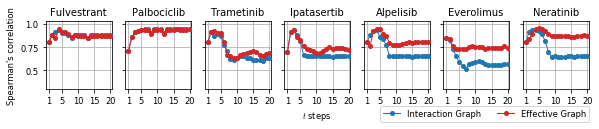

In [12]:
fig, axes = plt.subplots(1,7,figsize=(8.2,1.7), sharex=True, sharey=True)
axes = axes.flatten().tolist()
#
xs = np.arange(1, 21, 1)
for (node, si), (_, se), ax in zip(dfip.iteritems(), dfep.iteritems(), axes):
    #
    pi, = ax.plot(xs, si, c='#1f77b4', label='Interaction Graph', marker='o', ms=4, lw=1, ls='-', zorder=5)
    pe, = ax.plot(xs, se, c='#d62728', label='Effective Graph',marker='o', ms=4, lw=1, ls='-', zorder=6)
    
    ax.set_title(node, fontsize='medium')

    ax.set_xticks([1,5,10,15,20])
    ax.set_xticklabels([1,5,10,15,20], fontsize='small')
    ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
    ax.set_yticklabels([0.0,0.25,0.5,0.75,1.0], fontsize='small')
    ax.axhline(0, color='black', zorder=2)
    ax.grid(zorder=1)
    #ax.set(aspect=20)
    ax.set_xlim(-0.05,20.5)
    ax.set_ylim(0.30, 1.025)

axes[0].set_ylabel("Spearman's correlation", ha='center', fontsize='small')
axes[3].set_xlabel(r'$t$ steps', fontsize='small')
plt.legend(loc='lower right', bbox_to_anchor=(1.07,-0.55), ncol=2, fontsize='small')

#plt.tight_layout()
plt.subplots_adjust(left=0.07, right=0.99, bottom=0.29, top=0.84, wspace=0.2, hspace=0.35)
plt.savefig("BreastCancerPerturbations.pdf")
plt.show()